<a href="https://colab.research.google.com/github/nikhilbansal23/WebsiteKeywordsDetection/blob/main/Keyword_Detection_on_Websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# pip install beautifulsoup4

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
from bs4 import BeautifulSoup

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Keyword Detection on Websites/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Keyword Detection on Websites/test.csv')
keyboard_tumor = pd.read_csv('/content/drive/MyDrive/Datasets/Keyword Detection on Websites/keyword2tumor_type.csv')

In [25]:
train.head()

,url,doc_id,label
0,http://elbe-elster-klinikum.de/fachbereiche/ch...,1,1
1,http://klinikum-bayreuth.de/einrichtungen/zent...,3,3
2,http://klinikum-braunschweig.de/info.php/?id_o...,4,1
3,http://klinikum-braunschweig.de/info.php/?id_o...,5,1
4,http://klinikum-braunschweig.de/zuweiser/tumor...,6,3


# **Data Pre-Processing**

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_text(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract specific tags or text content based on HTML structure
        # For example:
        # text_content = soup.find('div', {'class': 'content'}).get_text()
        # return text_content
        return soup.get_text()  # This extracts all text content
    except Exception as e:
        print(f"Error fetching content from {url}: {e}")
        return None

# Apply the function to fetch text content for each URL in the DataFrame
train['text_content'] = train['url'].apply(extract_text)



Error fetching content from http://rendsburg.imland.de/de/thoraxchirurgie_kooperati/?f=1: HTTPConnectionPool(host='rendsburg.imland.de', port=80): Max retries exceeded with url: /de/thoraxchirurgie_kooperati/?f=1 (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x78a0b85dde40>: Failed to resolve 'rendsburg.imland.de' ([Errno -2] Name or service not known)"))
Error fetching content from http://www.dasdiak.de/bildungsangebote/untermenue/vorsprung-durch-wissen-fort-und-weiterbildung/medizinische-kliniken-und-institute/details.html/?chash=8f2bd33e874f84770d633c55ade760ad&item=67: HTTPConnectionPool(host='www.dasdiak.de', port=80): Max retries exceeded with url: /bildungsangebote/untermenue/vorsprung-durch-wissen-fort-und-weiterbildung/medizinische-kliniken-und-institute/details.html/?chash=8f2bd33e874f84770d633c55ade760ad&item=67 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x78a0b7b5c9a0>, 'Connection to www.dasdiak.de timed out. 

In [5]:
df = train

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           100 non-null    object
 1   doc_id        100 non-null    int64 
 2   label         100 non-null    int64 
 3   text_content  96 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [6]:
df['text_content'] = df['text_content'].astype(str)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                100 non-null    object
 1   doc_id             100 non-null    int64 
 2   label              100 non-null    int64 
 3   text_content       100 non-null    object
 4   detected_language  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [9]:
from bs4 import BeautifulSoup
import re
import pandas as pd

# Function to clean HTML text based on language
def clean_html_text_by_language(html_content):

        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()



        # Language-specific cleaning

            # English-specific cleaning
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        cleaned_text = cleaned_text.lower()


        return cleaned_text



# Assuming 'df' is your DataFrame and 'html_text_column' is the column with HTML text
# Replace 'html_text_column' with the actual column name containing HTML text


In [10]:
df['cleaned_text'] = df['text_content'].apply(clean_html_text_by_language)


In [11]:
from gensim.parsing import preprocessing


def preprocess_html_text(html_text: str) -> str:
    preprocessed_text = preprocessing.strip_non_alphanum(s=html_text)
    preprocessed_text = preprocessing.strip_multiple_whitespaces(s=preprocessed_text)
    preprocessed_text = preprocessing.strip_punctuation(s=preprocessed_text)
    preprocessed_text = preprocessing.strip_numeric(s=preprocessed_text)

    preprocessed_text = preprocessing.stem_text(text=preprocessed_text)
    preprocessed_text = preprocessing.remove_stopwords(s=preprocessed_text)
    return preprocessed_text




In [12]:
df["cleaned_text"] = df["cleaned_text"].apply(preprocess_html_text)

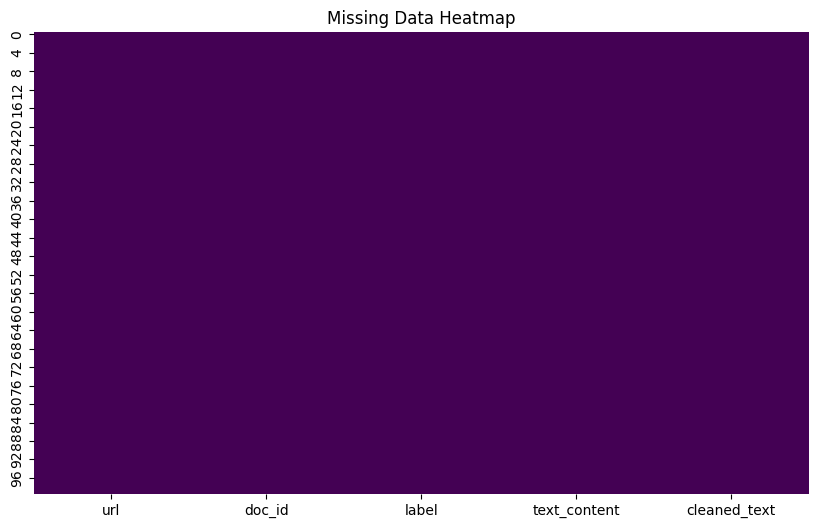

In [13]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Exploratory Data Analysis

In [14]:
import plotly.express as px
import plotly.offline as pyo

# set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)

There is one document with 170-179K characters. Others are with < 50K character count in total.

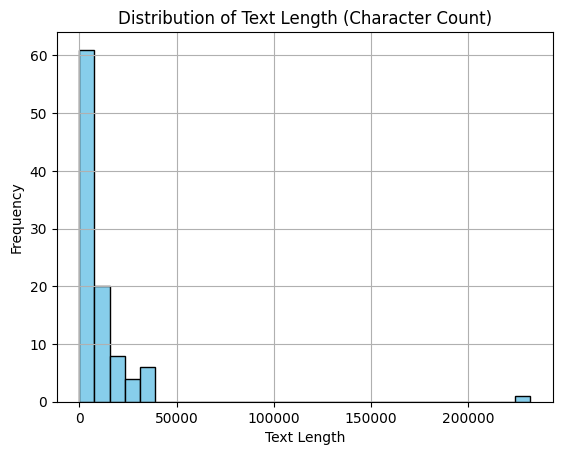

In [19]:
# Assuming df["cleaned_text"] contains the cleaned text data
text_lengths = df["cleaned_text"].apply(len)

# Create a histogram using Matplotlib
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length (Character Count)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is one document with 27-28K words. Other documents all have < 6K words in total.

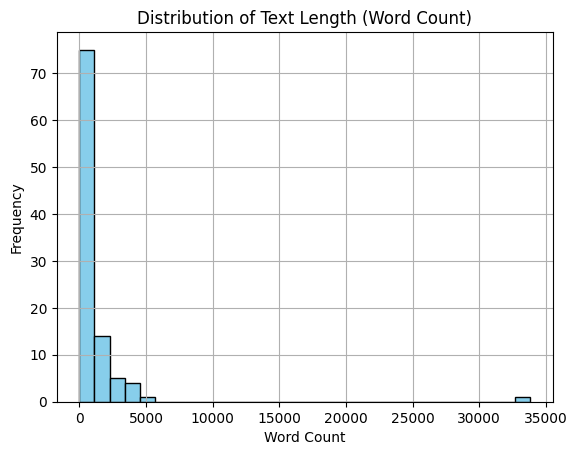

In [20]:
# Assuming df["cleaned_text"] contains the cleaned text data
word_lengths = df["cleaned_text"].apply(lambda text: len(text.split(" ")))

# Create a histogram using Matplotlib
plt.hist(word_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is one document with 6500-7000 unique words. All others consist of < 2000 unique words.

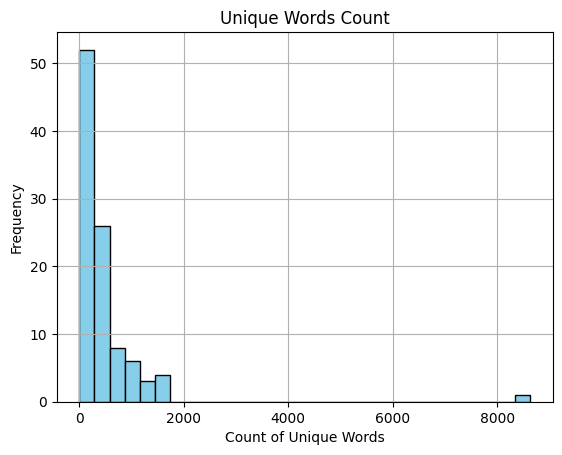

In [22]:
# Assuming train_csv["preprocessed_html_text"] contains the preprocessed text data
unique_words_count = df["cleaned_text"].apply(lambda text: len(set(text.split(" "))))

# Create a histogram using Matplotlib
plt.hist(unique_words_count, bins=30, color='skyblue', edgecolor='black')
plt.title('Unique Words Count')
plt.xlabel('Count of Unique Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Modeling

To solve our task, which falls under the umbrella of natural language processing, we will use a model called the siamese network. Siamese networks are able to address the class imbalance and small data set sizes. They are mostly used in few shots learning tasks, like signature verification systems, face recognition, object detection, etc.

In [23]:
import random
import numpy as np
import tensorflow as tf

# set the random seeds
np.random.seed(42)
tf.random.set_seed(seed=42)

## **Data Generators**
While it is not crucial in this task, we would like to show how to properly use Tensorflow (and Keras) by implementing a data generator class.

In [24]:
class Pair(tf.keras.utils.Sequence):
    def __init__(self, dataframe: pd.DataFrame, labels: pd.Series, n_batch: int, batch_size: int):
        self.dataframe = dataframe
        self.labels = labels
        self.n_batch = n_batch
        self.batch_size = batch_size
        self.all_classes = set(self.labels)
        self.anchor_groups = {}
        for target_class in self.all_classes:
            self.anchor_groups[target_class] = {
                "positive": self.dataframe[self.labels == target_class],
                "negative": self.dataframe[self.labels != target_class]
            }

    def __len__(self):
        return self.n_batch

    def __getitem__(self, item):
        pairs = []

        for i in range(int(self.batch_size / 2)):
            anchor_class = random.randint(1, 3)
            anchor_group = self.anchor_groups[anchor_class]["positive"]
            not_anchor_group = self.anchor_groups[anchor_class]["negative"]

            anchor = anchor_group.sample(n=1).iloc[0]
            positive = anchor_group.sample(n=1).iloc[0]
            negative = not_anchor_group.sample(n=1).iloc[0]

            pairs.append([anchor, positive, 1])
            pairs.append([anchor, negative, 0])

        random.shuffle(x=pairs)
        pairs = np.array(pairs)

        data_pairs = pairs[:, :2]
        targets = pairs[:, 2]

        return data_pairs, tf.convert_to_tensor(targets, dtype=np.float32)

    def get_support_set(self, sample_size: int = 1):
        support_set = {}
        for target_class in self.all_classes:
            support_set[target_class] = self.anchor_groups[target_class]["positive"].sample(n=sample_size)
        return support_set

## **Model Definition**
Here, we define our model, as a siamese network. The model is a sequence of layers, starting with a TextVectorization layer. This layer accepts natural language (text) as input, and maps it to an integer sequence. At initialization time, we should provide a vocabulary of words for it to be able to map the words at prediction time.

Following the text vectorization layer, we implement three Dense layers, with two Dropout layers in between. Lastly, we apply a L2 normalization layer to penalize large weights.

In [25]:
class SiameseNetwork(tf.keras.Model):
    def __init__(self, corpora: pd.Series):
        super(SiameseNetwork, self).__init__()
        self.vectorizer_layer: tf.keras.layers.TextVectorization = tf.keras.layers.TextVectorization(
            max_tokens=2000,
            output_mode="int",
            output_sequence_length=512
        )
        self.vectorizer_layer.adapt(corpora.values)
        self.encoder = tf.keras.Sequential(layers=[
            self.vectorizer_layer,
            tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
            tf.keras.layers.Lambda(function=lambda x: tf.math.l2_normalize(x, axis=1))
        ])
        self.encoding_distance = tf.keras.layers.Dot(axes=1)

    def __call__(self, inputs, *args, **kwargs):
        anchors, supports = inputs[:, 0], inputs[:, 1]
        anchors_encoded = self.encoder(anchors)
        supports_encoded = self.encoder(supports)
        return self.encoding_distance((anchors_encoded, supports_encoded))

    def predict_with_support_set(self, entry, support_set: dict):
        scores = {}
        for instance_class, texts in support_set.items():
            class_scores = ([self(np.array([entry, text]).reshape((-1, 2))) for text in texts])
            scores[instance_class] = tf.math.reduce_mean(class_scores)
        return max(scores, key=scores.get)

In [26]:
model = SiameseNetwork(corpora=df["cleaned_text"])

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='binary_accuracy')

At this point, we have our model, our data, and the data generator. We are ready to commence training.

But, before we do that, let's split the data in train_csv into training and validation sets.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df["cleaned_text"], df["label"],
                                                      test_size=0.2,
                                                      random_state=42, stratify=df["label"])

In [29]:
# training params
BATCH_SIZE = 64
N_BATCH = 100
# we instantiate training and validation data / pair generators
TRAIN_PAIR_GENERATOR = Pair(dataframe=X_train, labels=y_train, n_batch=N_BATCH, batch_size=BATCH_SIZE)
VALID_PAIR_GENERATOR = Pair(dataframe=X_valid, labels=y_valid, n_batch=N_BATCH, batch_size=BATCH_SIZE)

Finally, we put in an early stopping callback method that will stop the training prematurely if the validation loss does not decrease for 3 straight epochs.

In [30]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [31]:
history = model.fit(
    x=TRAIN_PAIR_GENERATOR,
    validation_data=VALID_PAIR_GENERATOR,
    epochs=10,
    callbacks=[early_stopping_callback],
    verbose=1
)

Epoch 1/10
100/100 [==============================] - 64s 605ms/step - loss: 0.3877 - binary_accuracy: 0.8333 - val_loss: 0.8263 - val_binary_accuracy: 0.6605
Epoch 2/10
100/100 [==============================] - 51s 512ms/step - loss: 0.2988 - binary_accuracy: 0.8803 - val_loss: 0.9787 - val_binary_accuracy: 0.6800
Epoch 3/10
100/100 [==============================] - 45s 448ms/step - loss: 0.2823 - binary_accuracy: 0.8783 - val_loss: 0.9506 - val_binary_accuracy: 0.6580
Epoch 4/10
100/100 [==============================] - 44s 443ms/step - loss: 0.2683 - binary_accuracy: 0.8816 - val_loss: 0.9778 - val_binary_accuracy: 0.6781


### Model Evaluation
Once we finish with the model training we can start evaluating the produced model. All training information is stored in the history object that is returned by the model.fit() method. In the plots below, we plot the model's training and validation accuracy and loss over the number of epochs.

In [32]:
import plotly.graph_objects as go

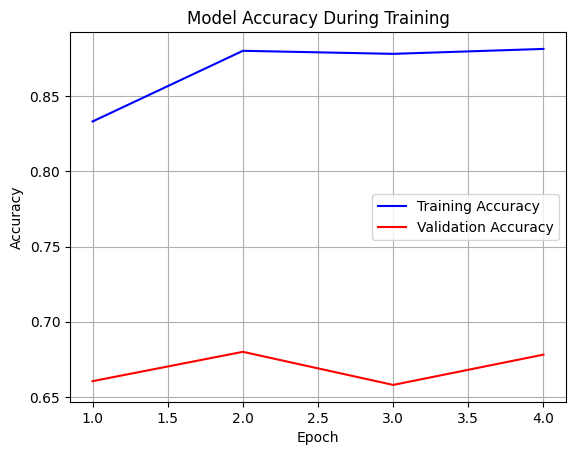

In [34]:
# Assuming history.history contains the training and validation accuracy values
epochs = range(1, len(history.history["binary_accuracy"]) + 1)

plt.plot(epochs, history.history["binary_accuracy"], 'b', label='Training Accuracy')
plt.plot(epochs, history.history["val_binary_accuracy"], 'r', label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

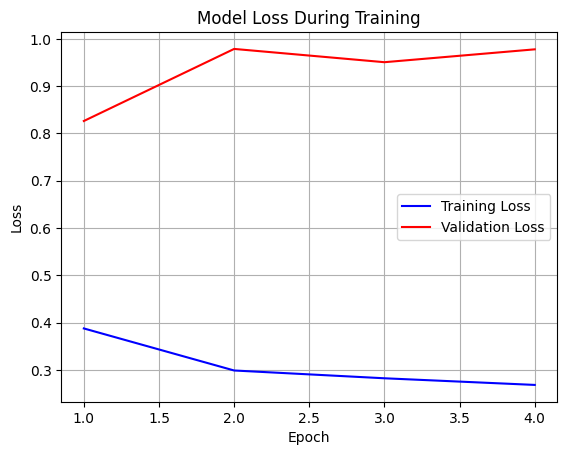

In [35]:
# Assuming history.history contains the training and validation loss values
epochs = range(1, len(history.history["loss"]) + 1)

plt.plot(epochs, history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, history.history["val_loss"], 'r', label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Let's try to make predictions on the validation set. The validation metrics are not indicative of the model's general performance on unseen data, since they have been used during the training process, therefore they are a bit optimistic. In general, we would expect the metrics to be lower in the production setting (though, not much lower - hopefully).

In [36]:
y_pred = X_valid.apply(lambda text: model.predict_with_support_set(
    entry=text,
    support_set=TRAIN_PAIR_GENERATOR.get_support_set(7)
))

In [37]:
# build a classification report
from sklearn.metrics import classification_report

report = classification_report(y_true=y_valid, y_pred=y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.73      0.92      0.81        12
           3       0.00      0.00      0.00         2

    accuracy                           0.75        20
   macro avg       0.51      0.53      0.51        20
weighted avg       0.68      0.75      0.71        20



### Prediction
We apply the same set of pre-processing steps as we did for the training data.

In [43]:
test['text_content'] = test['url'].apply(extract_text)

In [44]:
test["text_content"] = test["text_content"].apply(preprocess_html_text)

In [46]:
# test.sample(n=5, random_state=42)

In [48]:
# do inference
test["predictions"] = test["text_content"].apply(lambda text: model.predict_with_support_set(
    entry=text,
    support_set=TRAIN_PAIR_GENERATOR.get_support_set(sample_size=7)
))

In [49]:
test["predictions"].value_counts()

2    39
1     9
Name: predictions, dtype: int64

In [52]:
test.columns

Index(['url', 'doc_id', 'text_content', 'predictions'], dtype='object')